# 4.01 Initial Exploratory Visualisations

## <span style='color:green'>01 Import</span>
### <span style='color:blue'>a) Libraries</span>
### <span style='color:blue'>b) Data</span>
## <span style='color:green'>02 Create Subframes</span>
## <span style='color:green'>03 Correlation Matrix and Heatmap</span>
## <span style='color:green'>04 Scatterplots</span>

***
***
## 01 Import
### a) Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## b) Data

In [2]:
# Ensure charts are displayed in the notebook without the need to "call"
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\Michael\Desktop\Career Foundry\02 Data Immersion Course\06 Advanced Analytics and Dashboard Design'
# import data
df = pd.read_csv(os.path.join(path,'00 Data', 'World Bank Cleaned', 'eco_edu_pov.csv'))

***
***
## 02 Create Subframes

In [4]:
# make a list of the column headers and display the list
headers = list(df.columns.values)
headers

['Country Name',
 'Year',
 'GDP per capita (constant 2015 US$)',
 'GDP per capita growth (annual %)',
 'GNI per capita (constant 2015 US$)',
 'GNI per capita growth (annual %)',
 'Adolescents out of school (% of lower secondary school age)',
 'Adolescents out of school, female (% of female lower secondary school age)',
 'Adolescents out of school, male (% of male lower secondary school age)',
 'Children out of school (% of primary school age)',
 'Children out of school, female (% of female primary school age)',
 'Children out of school, male (% of male primary school age)',
 'Government expenditure on education, total (% of GDP)',
 'Primary completion rate, female (% of relevant age group)',
 'Primary completion rate, male (% of relevant age group)',
 'Primary completion rate, total (% of relevant age group)',
 'School enrollment, primary (% net)',
 'School enrollment, primary, female (% net)',
 'School enrollment, primary, male (% net)',
 'School enrollment, secondary (% net)',
 'Scho

In [5]:
# make a list of new column headers
headers_new = ['Country',
     'Year',
     'GDP per capita (US$)',
     'GDP per capita growth (%)',
     'GNI per capita (US$)',
     'GNI per capita growth (%)',
     'Secondary absence (%)',
     'Secondary absence (% F)',
     'Secondary absence (% M)',
     'Primary absence (%)',
     'Primary absence (% F)',
     'Primary absence (% M)',
     'Education Expendature (% GDP)',
     'Primary completion (% F)',
     'Primary completion (% M)',
     'Primary completion (%)',
     'Primary enrollment (%)',
     'Primary enrollment (% F)',
     'Primary enrollment (% M)',
     'Secondary enrollment (%)',
     'Secondary enrollment (% F)',
     'Secondary enrollment (% M)',
     'Gini',
     'Poverty $2.15 (%)',
     'Poverty $3.65 (%)',
     'Poverty $6.85 (%)',
     'Poverty  national poverty lines (%)']

In [6]:
# Rename the headers of the dataframe
for n in range(0, len(headers)):
    df.rename(columns={headers[n]: headers_new[n]}, inplace=True)

In [7]:
plotframes = df[['Poverty $2.15 (%)',
                 'Poverty $3.65 (%)',
                 'Poverty $6.85 (%)',
                 'Education Expendature (% GDP)',
                 'Primary enrollment (%)',
                 'Secondary enrollment (%)'
                 ]]

***
***
## 03 Correlation Matrix and Heatmap

In [8]:
# Matrix
plotframes.corr()

,Poverty $2.15 (%),Poverty $3.65 (%),Poverty $6.85 (%),Education Expendature (% GDP),Primary enrollment (%),Secondary enrollment (%)
Poverty $2.15 (%),1.000000,0.944588,0.800517,-0.279498,-0.634339,-0.821220
Poverty $3.65 (%),0.944588,1.000000,0.935777,-0.303762,-0.649004,-0.873725
Poverty $6.85 (%),0.800517,0.935777,1.000000,-0.299074,-0.596779,-0.852756
Education Expendature (% GDP),-0.279498,-0.303762,-0.299074,1.000000,0.297812,0.320328
Primary enrollment (%),-0.634339,-0.649004,-0.596779,0.297812,1.000000,0.730379
Secondary enrollment (%),-0.821220,-0.873725,-0.852756,0.320328,0.730379,1.000000


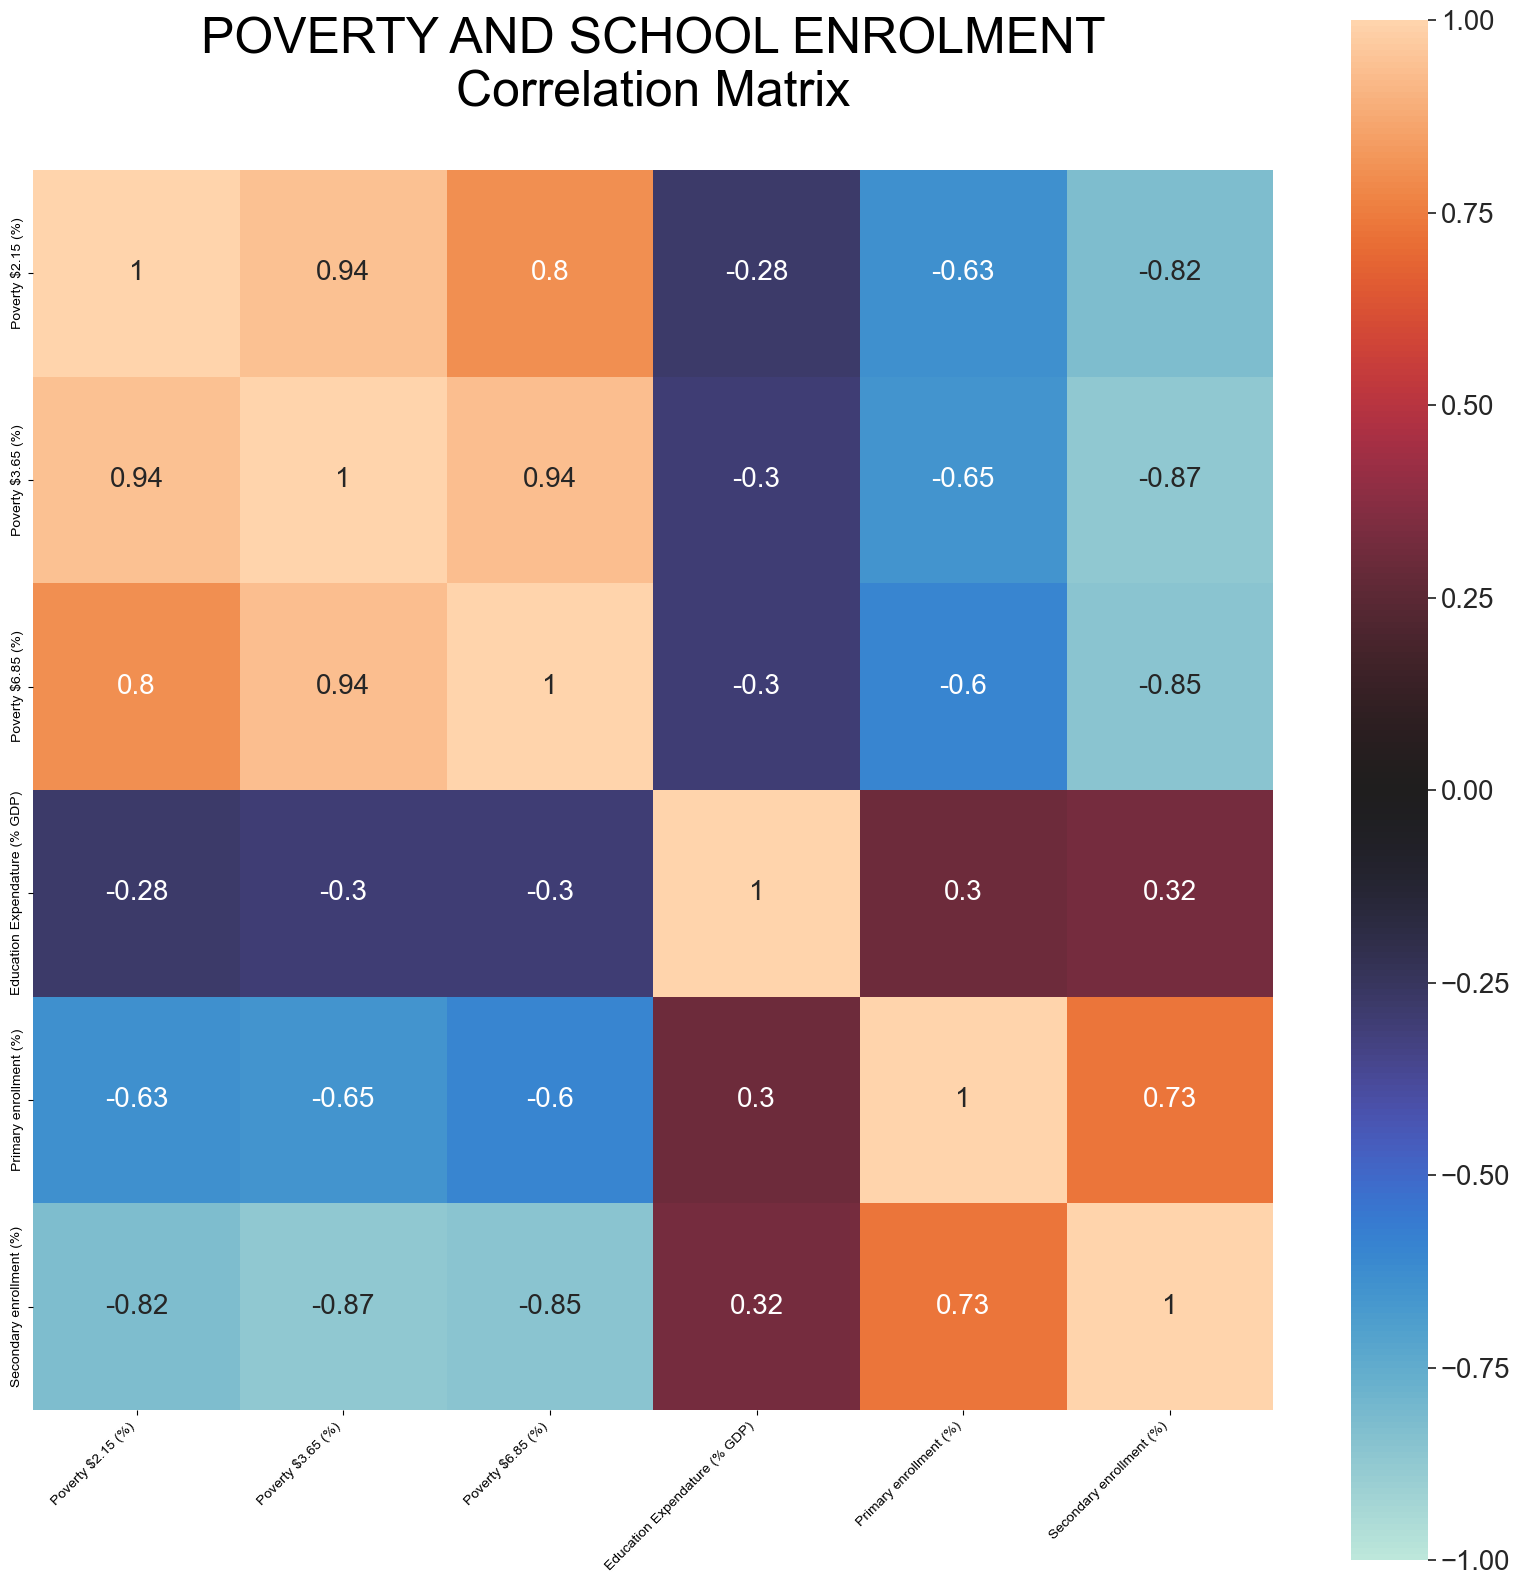

In [9]:
# Heatmap
# Dark means no correlation
# Orange is positive
# Blue is negative
f,ax = plt.subplots(figsize = (20,20))
sns.set(font_scale=1.8)
corr = sns.heatmap(plotframes.corr(),
                  annot = True,
                  ax = ax,
                  annot_kws={"size": 20},
                  vmin=-1, vmax=1, center=0,
                  square=True
                  )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    );
plt.title('POVERTY AND SCHOOL ENROLMENT\nCorrelation Matrix\n', fontsize=36)

plt.savefig(os.path.join(path,"00 Visualisations", "heatmap_pov_enrol.png"))

### Interpretation:
The key areas are looking for correlation between the measures of poverty (% population living on < $x per day) and the percentage of people enrolled in education (top right / bottom left quadrants).

These values all show strong, negative correlation. Therfore, an increase in the number of young people enrolled in education at primary and secondary level will indicate a lower percentage of people in each poverty band. With secondary enrollment being the better indicator due to these correllation coefficients being clser to -1 than the primary enrollment figures.

The enrollment in education almost equally correlated to the three bands of poverty as defined by The World Bank (<$2.15, <$3.65, and < $6.85).

Educatrion spending as a %GDP is also negatively correlated with the three poverty levels. Though, this correlation is weaker (-0.3, compared to a range -0.6 to -0.8).

The link is present, but if there is causation, and if so which is the cause and which the effect, is as yet unknown.

***
***
## 04 Pairplot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


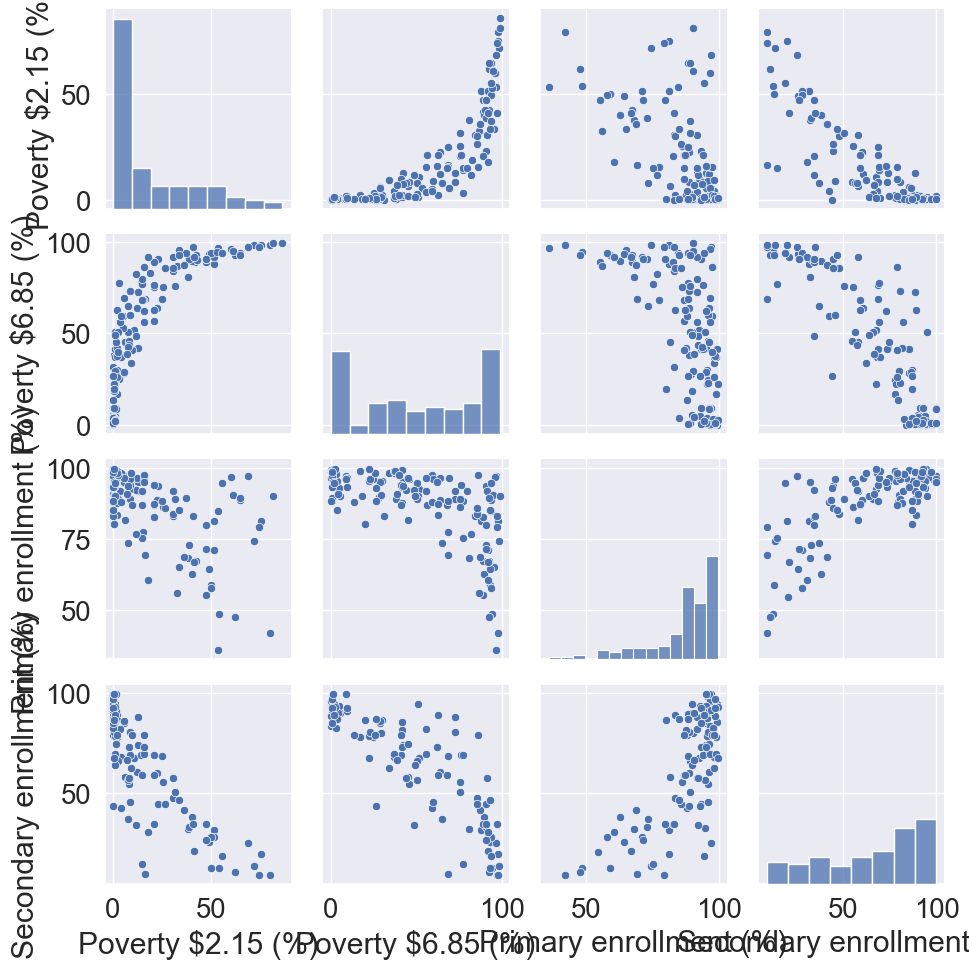

In [10]:
# Comparing the upper and lower poverty grouping with enrolment
# in school at primary and secondary levels
# Filering out the year 2006

pairframes = df[['Poverty $2.15 (%)',
                 'Poverty $6.85 (%)',
                 'Primary enrollment (%)',
                 'Secondary enrollment (%)'
                 ]]
sns.pairplot(pairframes[(df['Year'] == 2006)])

plt.savefig(os.path.join(path,"00 Visualisations", "pair_pov_enrol.png"))

### Interpretation
The primary and secondary enrolment histograms show that there is a greater proportion of people enroled in primary that in secondary (based on the higher frequencies of enrolment closer to 100% in primary).

The Poverty vs Enrolment scatter graphs show that there is higher enrolment in the upper poverty group (>6.85 USD per day). Furthermore, there is less than 20\% of people in the lowest poverty level (<2.15 USD per day) if once secondary enrolment reaches ~90\%. As previously, this is only a correlation and causation has not been seen.

In order to see the causation the study needs to begin looking at poverty levels in one year and school enrolment in before and after this year.

***
***
## 05 Scatterplots

In [11]:
df.head()

,Country,Year,GDP per capita (US$),GDP per capita growth (%),GNI per capita (US$),GNI per capita growth (%),Secondary absence (%),Secondary absence (% F),Secondary absence (% M),Primary absence (%),...,Primary enrollment (% F),Primary enrollment (% M),Secondary enrollment (%),Secondary enrollment (% F),Secondary enrollment (% M),Gini,Poverty $2.15 (%),Poverty $3.65 (%),Poverty $6.85 (%),Poverty national poverty lines (%)
0,Afghanistan,2004,354.033690,-2.497255,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,26.559950,14.403420,37.985020,NaN,NaN,NaN,NaN,33.70
1,Afghanistan,2005,379.955590,7.321874,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,26.559950,14.403420,37.985020,NaN,NaN,NaN,NaN,33.70
2,Afghanistan,2006,384.078064,1.084988,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,26.559950,14.403420,37.985020,NaN,NaN,NaN,NaN,33.70
3,Afghanistan,2007,429.412267,11.803383,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,26.559950,14.403420,37.985020,NaN,NaN,NaN,NaN,33.70
4,Afghanistan,2008,437.419752,1.864754,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.831775,17.472285,41.472855,NaN,NaN,NaN,NaN,34.85


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


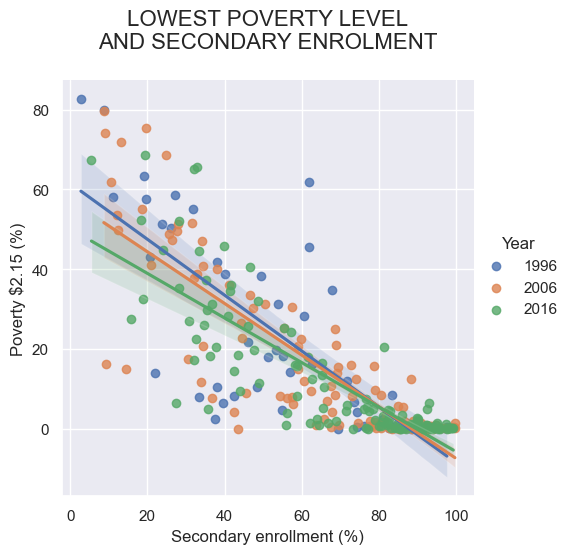

In [12]:
# Selecting for 3 years, showing how secondary enrolment rates
# and the three poverty bands are correlated.

sns.set(font_scale=1)
sns.lmplot(x = 'Secondary enrollment (%)',
           y = 'Poverty $2.15 (%)',
           hue = 'Year',
           data = df[(df['Year'] == 1996) |
                     (df['Year'] == 2006) |
                     (df['Year'] == 2016) ]
          )
plt.title('LOWEST POVERTY LEVEL\nAND SECONDARY ENROLMENT\n', fontsize=16)

plt.savefig(os.path.join(path,"00 Visualisations", "scatter_Lowestpov_2nd.png")) 

### Interpretation:
The negavite correlation between the enrolment rate to secondary school and the percentage of pople in the lowest category of poverty is strong, for all three of the years filtered out. But, once the enrolment rate reaches approximately 80% the correlation breaks down and the proportion below the poverty line is at close to zero. therefore, it is unable to reduce further and increased education enrolment does make a difference.

The year of the data does not appear to have any affect on the relatiponship. THerefore, we can 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


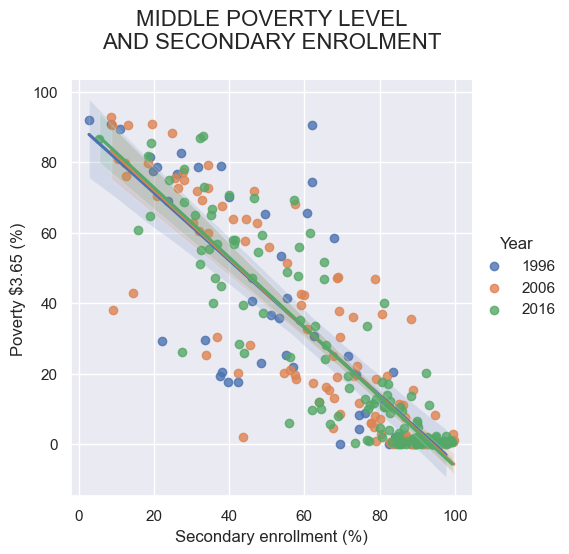

In [13]:
sns.set(font_scale=1)
sns.lmplot(x = 'Secondary enrollment (%)',
           y = 'Poverty $3.65 (%)',
           hue = 'Year',
           data = df[(df['Year'] == 1996) |
                     (df['Year'] == 2006) |
                     (df['Year'] == 2016) ]
          )
plt.title('MIDDLE POVERTY LEVEL\nAND SECONDARY ENROLMENT\n', fontsize=16)

plt.savefig(os.path.join(path,"00 Visualisations", "scatter_Middlepov_2nd.png")) 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


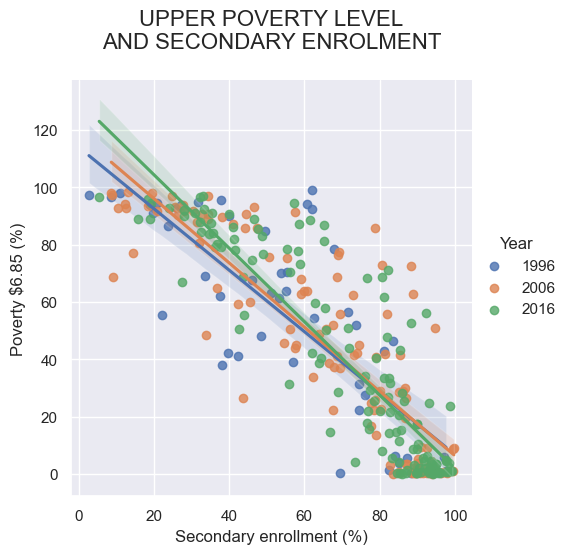

In [14]:
sns.set(font_scale=1)
sns.lmplot(x = 'Secondary enrollment (%)',
           y = 'Poverty $6.85 (%)',
           hue = 'Year',
           data = df[(df['Year'] == 1996) |
                     (df['Year'] == 2006) |
                     (df['Year'] == 2016) ]
          )
plt.title('UPPER POVERTY LEVEL\nAND SECONDARY ENROLMENT\n', fontsize=16)

plt.savefig(os.path.join(path,"00 Visualisations", "scatter_Upperpov_2nd.png")) 

### Interpretation

The middle and upper poverty bands show similar results to the lower poverty band.

The biiggest difference is that for then upper poverty band there are places showing close to 100% of population in this poverty group. Therefore, for the lowest levels of educatio enrolment the, where the poverty measure is close to 100% we have the affect that decreased enrolment will not see an increase in poverty proportion due to it being at or close to the limiting value (100).

### Make a histogram of the Gini index and catagorise the countries by these values.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


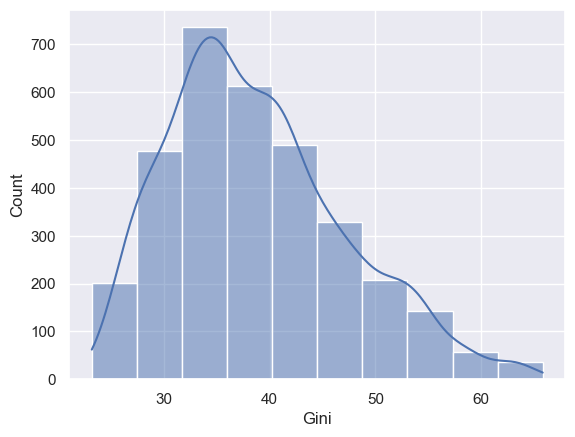

In [15]:
sns.histplot(df['Gini'], bins = 10, kde = True)
plt.savefig(os.path.join(path,"00 Visualisations", "hist_gini.png")) 

In [16]:
df.loc[(df['Gini'] <= 35), 'Gini Cat'] = 'Higher Relative Equality'

C:\Users\Michael\AppData\Local\Temp\ipykernel_4284\699115924.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Higher Relative Equality' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Gini'] <= 35), 'Gini Cat'] = 'Higher Relative Equality'


In [17]:
df.loc[(df['Gini'] > 35) & (df['Gini'] <= 45), 'Gini Cat'] = 'Median Relative Equality'

In [18]:
df.loc[(df['Gini'] > 45), 'Gini Cat'] = 'Lower Relative Equality'

## Compare the Correlation catagorising by Gini Grouping

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


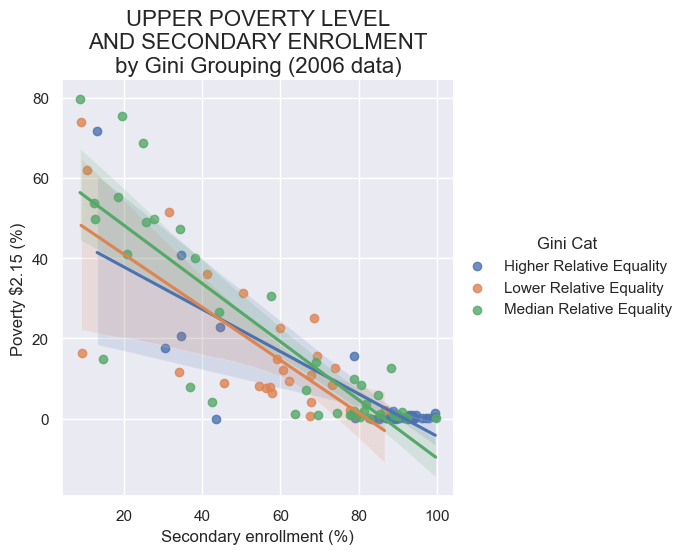

In [19]:
sns.set(font_scale=1)
sns.lmplot(x = 'Secondary enrollment (%)',
           y = 'Poverty $2.15 (%)',
           hue = 'Gini Cat',
           data = df[(df['Year'] == 2006) ]
          )
plt.title('UPPER POVERTY LEVEL\nAND SECONDARY ENROLMENT\nby Gini Grouping (2006 data)', fontsize=16)

plt.savefig(os.path.join(path,"00 Visualisations", "scatter_lowpov_2nd_gini.png"))

### Interpretation
The Gini represents the level of equality in a nation. The higher the Gini rating the lower the level of equality in a country.

The lowest and middle equality gorupings have a similar slope in the correlation. Thereofer, the link betwenn education enrollment and the lowest poverty group are similar. For the highest level of equality grouping (indicating a more even spead of wealth across the country) there is a lesser impact of education on poverty.

This is likely because ther is a link between the spread of wealth and development. Therefore, the education levels are high in the countries with an even spread of wealth (as seen by the blue data points being more prevalent in the right-hand side of the graph).

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


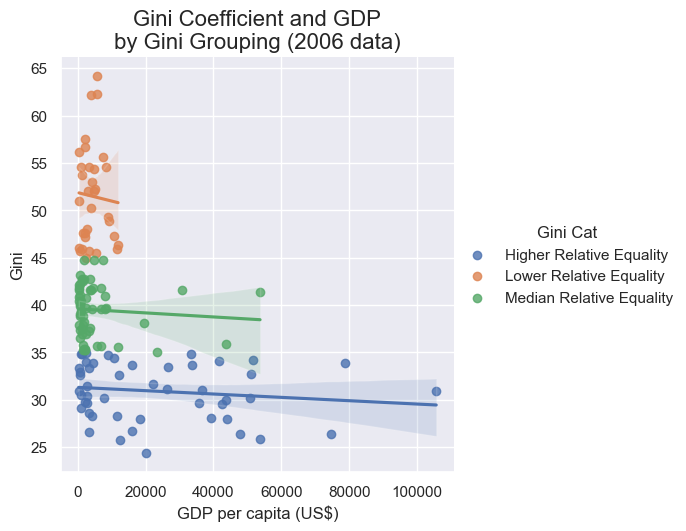

In [20]:
sns.set(font_scale=1)
sns.lmplot(x = 'GDP per capita (US$)',
           y = 'Gini',
           hue = 'Gini Cat',
           data = df[(df['Year'] == 2006) ]
          )
plt.title('Gini Coefficient and GDP\nby Gini Grouping (2006 data)', fontsize=16)

plt.savefig(os.path.join(path,"00 Visualisations", "scatter_gini_gdp.png"))

The GDP and Gini shows that those nations with a lower Gini (indicating higher eqality) have a higher GDP per capita (indicating greater weath and development). The nations with low equality are exclusively in the lowest level of GDP.

# Possible Hypotheses

1. If a nation has a higher number of secondary school aged children enrolled in school then the percentage of people in poverty will reduce.
2. If a nation has a higher number of primary school aged children enrolled in school then the percentage of people in poverty will reduce.
3. If a nation reduces its proportion of poeple in poverty then its enducation enrolment will increase.
4. If a nation increases its level of equality (lowers its Gini) then more young people will enroll in school.